In [2]:
from pandas_datareader import data
import pandas as pd
import datetime

start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 12, 1 )

sp500 = data.DataReader("^GSPC", 'yahoo', start, end)

sp500.loc[:, 'avg_price'] = (sp500.loc[:, 'High'] + sp500.loc[:, 'Low'] + sp500.loc[:, 'Close'])/3

sp500.head()

,Open,High,Low,Close,Volume,Adj Close,avg_price
Date,,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,4304880000,2012.660034,2013.513346
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,3706620000,2016.709961,2014.273315
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,4336660000,1990.260010,1993.673340
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,5076590000,1943.089966,1955.746623
2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,4664940000,1922.030029,1933.630005


In [3]:
def arithmetic_return_action(data, k = 30, p = 0.05, t = 0.15):
    '''
    This function will calculate arithmetic return of k days and based on the sum return to determine actions
    
    :param df: stock data
    :param k: number of days
    :param p: cutoff rate
    :param t: sum of the return rate to  a action: buy, hold, or sell
    :return: stock data labeled with actions
    '''

    import numpy as np
    df = data.copy()
    df.loc[:, 'temp_return'] = 0
    df.loc[:, 'sum_return']  = 0
    
    
    for i in range(1, k + 1):
        
        df.loc[:, 'temp_return'] = (df.loc[:, 'avg_price'].shift(-i) - df.loc[:, 'Close']) / df.loc[:, 'Close']
        df.loc[np.fabs(df.temp_return) > p, 'sum_return'] += df.loc[(np.fabs(df.temp_return) > p), 'temp_return']

    
    df.loc[df.sum_return >= t, 'action'] = 'buy'    
    df.loc[(df.sum_return < t) & (df.sum_return > -t), 'action'] = 'hold'  
    df.loc[df.sum_return <= -t, 'action'] = 'sell'
    
    return df.loc[:, ['Open', 'High', 'Low', 'Close', 'Volume', 'avg_price', 'sum_return', 'action']]

In [4]:
sp_3m = sp500.loc[:'2016-3-31']

sp_3m_action = arithmetic_return_action(sp_3m)

sp_3m_action.describe()

,Open,High,Low,Close,Volume,avg_price,sum_return
count,61.000000,61.000000,61.000000,61.000000,6.100000e+01,61.000000,61.000000
mean,1950.946223,1963.812776,1934.444592,1951.224914,4.558996e+09,1949.827427,0.230294
std,63.782953,60.441632,68.971680,65.220669,7.325942e+08,64.538896,0.599457
min,1833.400024,1847.000000,1810.099976,1829.079956,2.809090e+09,1828.726644,-1.404052
25%,1902.520020,1916.989990,1877.400024,1903.030029,4.078620e+09,1897.716675,0.000000
50%,1937.089966,1950.329956,1920.300049,1939.380005,4.570670e+09,1935.626668,0.000000
75%,2011.709961,2015.939941,1989.680054,2012.660034,5.011540e+09,2012.366658,0.339900
max,2063.770020,2072.209961,2058.270020,2063.949951,6.503140e+09,2064.809977,2.266714


The strategy here is if a signal is buy, then we will buy 100 shares at the avg price each time, if signal is sell, we will sell the 100 shares at avg price each time. Based on above 3-month statistic data, the distribution is negative skewed, we set the cutoff rate as 5% and T value as 15%

In [5]:
money_out = sp_3m_action.loc[sp_3m_action.action == 'buy', 'avg_price'].sum() * 100
money_in = sp_3m_action.loc[sp_3m_action.action == 'sell', 'avg_price'].sum() * 100
position = sp_3m_action.loc[sp_3m_action.action == 'buy', 'action'].count() - sp_3m_action.loc[sp_3m_action.action == 'sell', 'action'].count()

avg_cost = (money_out-money_in)/position/100

print('At the end of March 31, 2016, our portfolio position is: {:d} shares, average price bought/sold is: ${:,.2f}'.format(position*100, avg_cost))

At the end of March 31, 2016, our portfolio position is: 2100 shares, average price bought/sold is: $1,880.40


In [6]:
sp500.loc['2016-4-28']

Open         2.090930e+03
High         2.099300e+03
Low          2.071620e+03
Close        2.075810e+03
Volume       4.309840e+09
Adj Close    2.075810e+03
avg_price    2.082243e+03
Name: 2016-04-28 00:00:00, dtype: float64

In [7]:
profit = (sp500.loc['2016-4-28', 'avg_price'] - avg_cost) * position * 100

print('By the end of April 2016, the portfolio profit is ${:,.2f}'.format(profit))

By the end of April 2016, the portfolio profit is $423,861.84


This model can be so profitable is because that all its action are based on already-known future returns, under this assumption, you can't lose money.
Thus, we will use a machine learning method to do a real prediction.

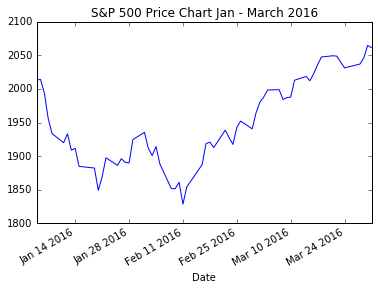

In [8]:
%matplotlib inline
sp_3m.loc[:, 'avg_price'].plot(title="S&P 500 Price Chart Jan - March 2016")

In [9]:
def label_action(data, k = 30, p = 0.05, t = 0.15):
    '''
    This function will calculate arithmetic return of k days and based on the sum return to label actions
    
    :param df: stock data
    :param k: number of days
    :param p: cutoff rate
    :param t: sum of the return rate to label a action: buy, hold, or sell
    :return: stock data labeled with actions
    '''

    import numpy as np
    df = data.copy()
    df.loc[:, 'temp_return'] = 0
    df.loc[:, 'sum_return']  = 0
    
    
    for i in range(1, k + 1):
        
        df.loc[:, 'temp_return'] = (df.loc[:, 'avg_price'].shift(-i) - df.loc[:, 'Close']) / df.loc[:, 'Close']
        df.loc[np.fabs(df.temp_return) > p, 'sum_return'] += df.loc[(np.fabs(df.temp_return) > p), 'temp_return']

    
    df.loc[df.sum_return >= t, 'action'] = 'buy'    
    df.loc[(df.sum_return < t) & (df.sum_return > -t), 'action'] = 'hold'  
    df.loc[df.sum_return <= -t, 'action'] = 'sell' 
    
    return df

In [10]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

df = label_action(sp500)

df.loc[:, 'action'] = label.fit_transform(df.loc[:, 'action'].astype(str))

df = df.loc[:'2016-10-31']

In [11]:
from sklearn import ensemble, metrics
X_train = df.loc[:'2016-09-30',['Open', 'High', 'Low', 'Close', 'Volume', 'avg_price']]
y_train = df.loc[:'2016-09-30','action']
X_test = df.loc['2016-10-01':,['Open', 'High', 'Low', 'Close', 'Volume', 'avg_price']]
y_test = df.loc['2016-10-01':, 'action']

params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingClassifier()
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

confusion = metrics.confusion_matrix(y_test, y_predict)

print(clf.score(X_test, y_test))

1.0


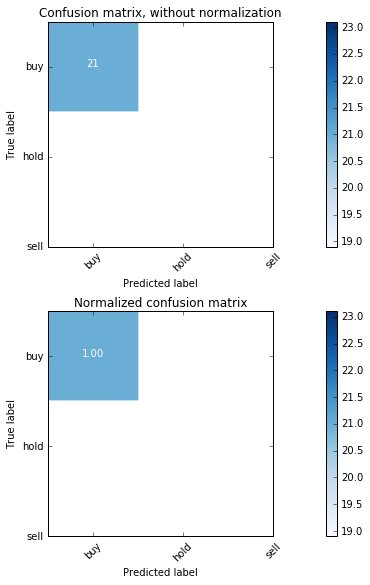

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, '{:.2f}'.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        else: 
            plt.text(j, i, '{:.0f}'.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


np.set_printoptions(precision=2)

plt.figure(figsize=(15,8))
plt.subplot(211)

plot_confusion_matrix(confusion, classes=label.inverse_transform([0,1,2]),
                      title='Confusion matrix, without normalization')

plt.subplot(212)
plot_confusion_matrix(confusion, classes=label.inverse_transform([0,1,2]), normalize=True,
                      title='Normalized confusion matrix')

In [13]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)

clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

confusion = metrics.confusion_matrix(y_test, y_predict)

print(clf.score(X_test, y_test))

1.0


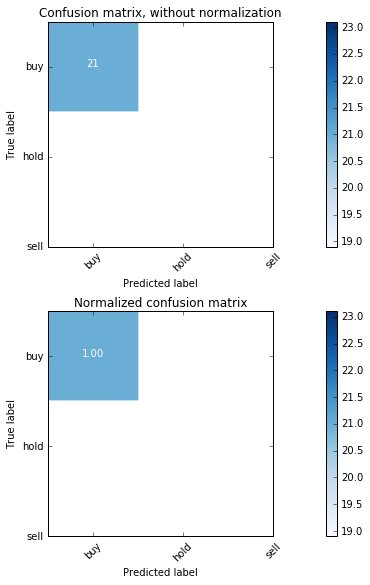

In [14]:
np.set_printoptions(precision=2)

plt.figure(figsize=(15,8))
plt.subplot(211)

plot_confusion_matrix(confusion, classes=label.inverse_transform([0,1,2]),
                      title='Confusion matrix, without normalization')

plt.subplot(212)
plot_confusion_matrix(confusion, classes=label.inverse_transform([0,1,2]), normalize=True,
                      title='Normalized confusion matrix')

In [16]:
it_stock = pd.read_csv('/Users/Maxwell/PycharmProjects/Github/FinancialProgramClass/companylist_it.csv').loc[:, 'Symbol']
bank_stock = pd.read_csv('/Users/Maxwell/PycharmProjects/Github/FinancialProgramClass/companylist_bank.csv').loc[:, 'Symbol']

stock = pd.DataFrame()

for ticker in it_stock:
    
    df_temp = data.DataReader(ticker, 'yahoo', start, end)
    df_temp.loc[:, 'Ticker'] = str(ticker)
    df_temp.loc[:, 'Industry'] = 'IT'
    df_temp.loc[:, 'avg_price']= (df_temp.loc[:, 'High'] + df_temp.loc[:, 'Low'] + df_temp.loc[:, 'Close'])/3
    df_temp = label_action(df_temp)
    stock = pd.concat([stock,df_temp])

for ticker in bank_stock:
    
    df_temp = data.DataReader(ticker, 'yahoo', start, end)
    df_temp.loc[:, 'Ticker'] = str(ticker)
    df_temp.loc[:, 'Industry'] = 'Bank'
    df_temp.loc[:, 'avg_price']= (df_temp.loc[:, 'High'] + df_temp.loc[:, 'Low'] + df_temp.loc[:, 'Close'])/3
    df_temp = label_action(df_temp)
    stock = pd.concat([stock,df_temp])

In [17]:
stock.head()

,Open,High,Low,Close,Volume,Adj Close,Ticker,Industry,avg_price,temp_return,sum_return,action
Date,,,,,,,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,67649400,103.057063,AAPL,IT,104.240000,-0.074577,-2.276918,sell
2016-01-05,105.750000,105.849998,102.410004,102.709999,55791000,100.474523,AAPL,IT,103.656667,-0.054815,-1.391069,sell
2016-01-06,100.559998,102.370003,99.870003,100.699997,68457400,98.508268,AAPL,IT,100.980001,-0.044687,-0.560212,sell
2016-01-07,98.680000,100.129997,96.430000,96.449997,81094400,94.350769,AAPL,IT,97.669998,0.001210,0.000000,hold
2016-01-08,98.550003,99.110001,96.760002,96.959999,70798000,94.849671,AAPL,IT,97.610001,-0.017670,0.000000,hold


In [43]:
label_action = LabelEncoder()
#label_ticker = LabelEncoder()
#label_industry = LabelEncoder()

df = stock.copy()

df.loc[:, 'action'] = label_action.fit_transform(df.loc[:, 'action'].astype(str))
#df.loc[:, 'Ticker'] = label_ticker.fit_transform(df.loc[:, 'Ticker'].astype(str))
#df.loc[:, 'Industry'] = label_industry.fit_transform(df.loc[:, 'Industry'].astype(str))

df = df.loc[:'2016-10-31']


X_train = df.loc[:'2016-09-30',['Open', 'High', 'Low', 'Close', 'Volume', 'avg_price']]
y_train = df.loc[:'2016-09-30','action']
X_test = df.loc['2016-10-01':,['Open', 'High', 'Low', 'Close', 'Volume', 'avg_price']]
y_test = df.loc['2016-10-01':, 'action']

params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingClassifier()
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

df.loc['2016-10-01':, 'predict_action_gb'] = label_action.inverse_transform(y_predict)

confusion = metrics.confusion_matrix(y_test, y_predict)

print(clf.score(X_test, y_test))

0.522837706511


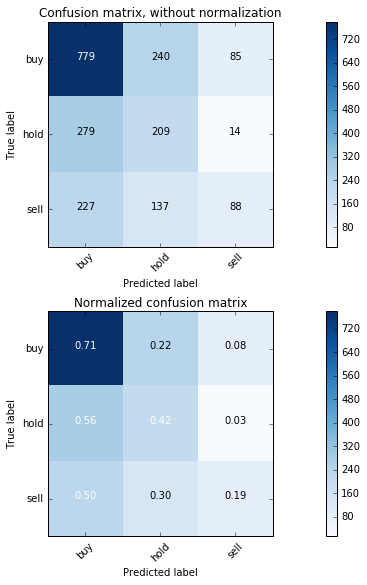

In [44]:
np.set_printoptions(precision=2)

plt.figure(figsize=(15,8))
plt.subplot(211)

plot_confusion_matrix(confusion, classes=label.inverse_transform([0,1,2]),
                      title='Confusion matrix, without normalization')

plt.subplot(212)
plot_confusion_matrix(confusion, classes=label.inverse_transform([0,1,2]), normalize=True,
                      title='Normalized confusion matrix')

In [45]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)

clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

confusion = metrics.confusion_matrix(y_test, y_predict)

print(clf.score(X_test, y_test))

0.243926141885


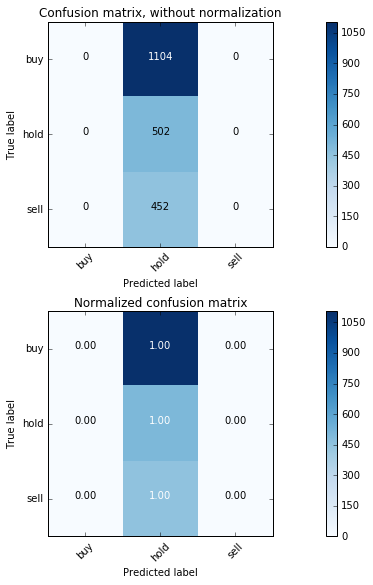

In [46]:
np.set_printoptions(precision=2)

plt.figure(figsize=(15,8))
plt.subplot(211)

plot_confusion_matrix(confusion, classes=label.inverse_transform([0,1,2]),
                      title='Confusion matrix, without normalization')

plt.subplot(212)
plot_confusion_matrix(confusion, classes=label.inverse_transform([0,1,2]), normalize=True,
                      title='Normalized confusion matrix')

In [51]:
portfolio = df.loc['2016-10-01':].copy()

portfolio.loc[:, 'action'] = label_action.inverse_transform(df.loc['2016-10-01':, 'action'])
#portfolio.loc[:, 'Ticker'] = label_ticker.inverse_transform(df.loc['2016-10-01':, 'Ticker'])
#portfolio.loc[:, 'Industry'] = label_industry.inverse_transform(df.loc['2016-10-01':, 'Industry'])

In [52]:
portfolio.loc[portfolio.predict_action_gb == 'buy', 'position']= 100
portfolio.loc[portfolio.predict_action_gb == 'sell', 'position'] = -100
portfolio.loc[portfolio.predict_action_gb == 'hold', 'position'] = 0

portfolio.loc[:, 'value'] = portfolio.loc[:, 'position'] * portfolio.loc[:, 'avg_price'] 


df_new = portfolio.groupby(['Ticker', 'Industry']).sum()

df_new

,,Open,High,Low,Close,Volume,Adj Close,avg_price,temp_return,sum_return,position,value
Ticker,Industry,,,,,,,,,,,
AAPL,IT,2430.619982,2444.150001,2413.769981,2429.850005,686914300,2417.438337,2429.256662,-0.621160,-13.919771,0.0,0.000000
ADBE,IT,2280.050004,2291.039978,2262.830001,2275.699989,35130100,2275.699989,2276.523323,-0.484669,-2.016237,700.0,75733.333333
ADI,IT,1328.060007,1337.720017,1314.750003,1326.289981,51773800,1326.289981,1326.253334,1.672237,22.471641,800.0,49657.333333
ADP,IT,1834.890001,1841.960000,1822.729995,1831.339989,29998900,1820.466378,1832.009995,1.160267,16.842396,400.0,34778.666667
ADSK,IT,1495.880012,1509.840013,1479.459999,1493.139999,29385600,1493.139999,1494.146670,0.781806,10.375813,1100.0,78613.667067
AIG,Bank,1264.559990,1273.649987,1257.990003,1266.040004,109575600,1259.731466,1265.893331,0.866706,9.363633,1900.0,114800.333200
AMAT,IT,608.509996,613.109995,600.819997,606.109999,239841100,604.176627,606.679997,0.963987,11.696043,2100.0,60667.999700
ATVI,IT,925.299996,931.770004,916.270005,923.080003,121910900,923.080003,923.706671,-1.747489,-35.313869,2100.0,92370.667067
AVGO,IT,3617.429979,3645.639955,3578.739961,3610.760023,42303600,3590.235107,3611.713313,-0.041363,-0.614376,200.0,34189.334100


So we assume we keep this position until Dec 1, 2016 and close out all positions, let's see the profit or loss we will have. 

In [88]:
pnl = df_new.copy()[['position', 'value']]

last_day = stock.loc['2016-12-1', ['Ticker', 'avg_price']]

last_day.reset_index(drop=True, inplace=True)

pnl.reset_index(inplace=True)

pnl = pd.merge(pnl, last_day, on='Ticker')

In [94]:
pnl.loc[:, 'p&l'] = pnl.loc[:, 'position'] * pnl.loc[:, 'avg_price'] - pnl.loc[:, 'value']

result = pnl.groupby(['Ticker', 'Industry']).sum()

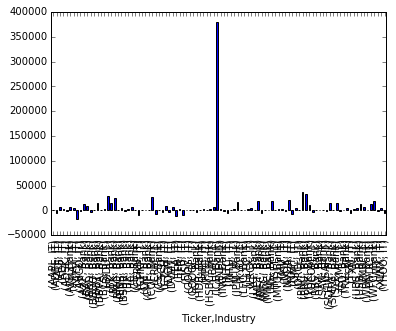

In [97]:
result.loc[:, 'p&l'].plot(kind='bar', figsize)